## Business Intelligence 

### Aysan Esmradi

### Title: Starbucks Customer Survey


In [1020]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1021]:
#loading the dataset
data = pd.read_csv("Starbucks satisfactory survey.csv")
data.head(3)

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbuckss outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,"Website,Apps,Social Media,Emails,Deal sites",Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,"Social Media,In Store displays",Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,"In Store displays,Billboards",Yes


## (1) preprocessing on the dataset

In [1022]:
data.shape

(122, 21)

In [1023]:
#name of the columns
data.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Starbucks?',
       '6. How do you usually enjoy Starbucks?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Starbuckss outlet to you is...?',
       '9. Do you have Starbucks membership card?',
       '10. What do you most frequently purchase at Starbucks?',
       '11. On average, how much would you spend at Starbucks per visit?',
       '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Starbucks?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Starbucks as..',
       '17. How would you rate the service at S

In [1024]:
#delete the a Useless column
data.drop(columns='Timestamp',inplace = True) #axis = 1 for columns 
data.reset_index(inplace=True)
#add the id column to ensure the uniqueness of each row.
data.rename(columns={'index':'id'},inplace=True) 
data.head()
#dataset.head()

,id,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbuckss outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,"Website,Apps,Social Media,Emails,Deal sites",Yes
1,1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,"Social Media,In Store displays",Yes
2,2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,"In Store displays,Billboards",Yes
3,3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,friends,No
4,4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,"Website,Apps,Social Media",Yes


In [1025]:
#rename the columns name to have easy access.
data.rename(columns={'1. Your Gender': 'gender', '2. Your Age': 'age', '3. Are you currently....?': 'status', '4. What is your annual income?': 'income',
                        '5. How often do you visit Starbucks?': 'visitNo','6. How do you usually enjoy Starbucks?': 'visitType',
                        '7. How much time do you normally  spend during your visit?': 'timeSpend',
                        '8. The nearest Starbuckss outlet to you is...?': 'distance',
                        '9. Do you have Starbucks membership card?': 'membershipCard',
                       '10. What do you most frequently purchase at Starbucks?' : 'frequent_purchase',
                       '11. On average, how much would you spend at Starbucks per visit?': 'spendPurchase',
                       '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:':'productRate',
                       '13. How would you rate the price range at Starbucks?':'priceRate',
                       '14. How important are sales and promotions in your purchase decision?': 'promotionsRate',
                       '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)': 'ambianceRate',
                       '16. You rate the WiFi quality at Starbucks as..': 'wifiRate',
                       '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)':'serviceRate',
                       '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?':'chooseRate',
                       '19. How do you come to hear of promotions at Starbucks? Check all that apply.': 'promotionsMethod',
                       '20. Will you continue buying at Starbucks?': 'loyalty'}, inplace=True)
data.head(5)

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,...,spendPurchase,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate,promotionsMethod,loyalty
0,0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,"Website,Apps,Social Media,Emails,Deal sites",Yes
1,1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,"Social Media,In Store displays",Yes
2,2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,"In Store displays,Billboards",Yes
3,3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,friends,No
4,4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,"Website,Apps,Social Media",Yes


In [1026]:
# Type of dataset
data.dtypes

id                    int64
gender               object
age                  object
status               object
income               object
visitNo              object
visitType            object
timeSpend            object
distance             object
membershipCard       object
frequent_purchase    object
spendPurchase        object
productRate           int64
priceRate             int64
promotionsRate        int64
ambianceRate          int64
wifiRate              int64
serviceRate           int64
chooseRate            int64
promotionsMethod     object
loyalty              object
dtype: object

In [1027]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 122 non-null    int64 
 1   gender             122 non-null    object
 2   age                122 non-null    object
 3   status             122 non-null    object
 4   income             122 non-null    object
 5   visitNo            122 non-null    object
 6   visitType          121 non-null    object
 7   timeSpend          122 non-null    object
 8   distance           122 non-null    object
 9   membershipCard     122 non-null    object
 10  frequent_purchase  122 non-null    object
 11  spendPurchase      122 non-null    object
 12  productRate        122 non-null    int64 
 13  priceRate          122 non-null    int64 
 14  promotionsRate     122 non-null    int64 
 15  ambianceRate       122 non-null    int64 
 16  wifiRate           122 non-null    int64 
 1

In [1028]:
# get basic statistics on numerical columns in the dataframe
data.describe()

,id,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,60.500000,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,35.362409,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,30.250000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,60.500000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,90.750000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,121.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [1029]:
# check if any missing value in each column
data.isnull().any()

id                   False
gender               False
age                  False
status               False
income               False
visitNo              False
visitType             True
timeSpend            False
distance             False
membershipCard       False
frequent_purchase    False
spendPurchase        False
productRate          False
priceRate            False
promotionsRate       False
ambianceRate         False
wifiRate             False
serviceRate          False
chooseRate           False
promotionsMethod      True
loyalty              False
dtype: bool

In [1030]:
# count the missing value in each column
data.isnull().sum()

id                   0
gender               0
age                  0
status               0
income               0
visitNo              0
visitType            1
timeSpend            0
distance             0
membershipCard       0
frequent_purchase    0
spendPurchase        0
productRate          0
priceRate            0
promotionsRate       0
ambianceRate         0
wifiRate             0
serviceRate          0
chooseRate           0
promotionsMethod     1
loyalty              0
dtype: int64

In [1031]:
# get all rows with any mssing value in columns
data[data.isnull().any(axis=1)]

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,...,spendPurchase,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate,promotionsMethod,loyalty
81,81,Male,From 20 to 29,Employed,"Less than RM25,000",Never,NaN,Below 30 minutes,more than 3km,No,...,Zero,1,1,1,3,3,3,3,NaN,No


In [1032]:
#Since VisitType and promotionsMethod both are object, we can replace 
#their missing values with the "mode" of each associated column..
data['visitType'] = data['visitType'].fillna(data['visitType'].mode()[0])
data['promotionsMethod'] = data['promotionsMethod'].fillna(data['promotionsMethod'].mode()[0])
data.iloc[[81]]

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,...,spendPurchase,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate,promotionsMethod,loyalty
81,81,Male,From 20 to 29,Employed,"Less than RM25,000",Never,Take away,Below 30 minutes,more than 3km,No,...,Zero,1,1,1,3,3,3,3,Social Media,No


In [1033]:
data.isnull().any()

id                   False
gender               False
age                  False
status               False
income               False
visitNo              False
visitType            False
timeSpend            False
distance             False
membershipCard       False
frequent_purchase    False
spendPurchase        False
productRate          False
priceRate            False
promotionsRate       False
ambianceRate         False
wifiRate             False
serviceRate          False
chooseRate           False
promotionsMethod     False
loyalty              False
dtype: bool

In [1034]:
#Know the different values of each column
for col in data:
    print(col)
    print(data[col].value_counts())
    print('\n')

id
0      1
91     1
89     1
88     1
87     1
      ..
36     1
35     1
34     1
33     1
121    1
Name: id, Length: 122, dtype: int64


gender
Female    65
Male      57
Name: gender, dtype: int64


age
From 20 to 29    85
From 30 to 39    17
Below 20         13
40 and above      7
Name: age, dtype: int64


status
Employed         61
Student          42
Self-employed    17
Housewife         2
Name: status, dtype: int64


income
Less than RM25,000       71
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: income, dtype: int64


visitNo
Rarely     76
Monthly    26
Weekly      9
Never       9
Daily       2
Name: visitNo, dtype: int64


visitType
Take away             50
Dine in               46
Drive-thru            20
never                  2
I dont like coffee     1
Never                  1
Never                  1
Never buy              1
Name: visitType, dtype: int64


timeSpend
Below 30 minutes                73
B

In [1035]:
data['visitType'].value_counts()

Take away             50
Dine in               46
Drive-thru            20
never                  2
I dont like coffee     1
Never                  1
Never                  1
Never buy              1
Name: visitType, dtype: int64

In [1036]:
# Delete redundant data to the Never Buy value in visitType

data['visitType'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never '], 'Other', inplace = True)
data['visitType'].value_counts()

Take away     50
Dine in       46
Drive-thru    20
Other          6
Name: visitType, dtype: int64

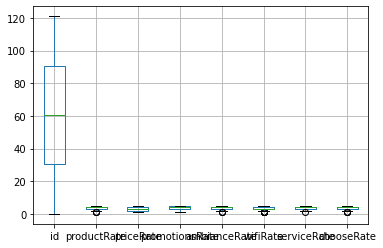

In [1037]:
#Check outliers in the dataset
boxplot = data.boxplot()

In [1038]:
#Check duplicated row in the whole of the dataset
duplicated_row=data.duplicated(subset=None, keep='first')
duplicated_row = pd.DataFrame(duplicated_row)
duplicated_row.value_counts()

False    122
dtype: int64

## (2) Methodology

In [1039]:
#count the frequency
object_cols= data.select_dtypes(include='object').columns
object_cols

Index(['gender', 'age', 'status', 'income', 'visitNo', 'visitType',
       'timeSpend', 'distance', 'membershipCard', 'frequent_purchase',
       'spendPurchase', 'promotionsMethod', 'loyalty'],
      dtype='object')

CountPlot for the column: gender


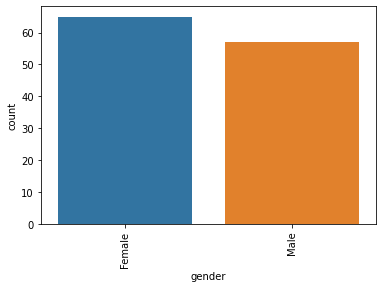

CountPlot for the column: age


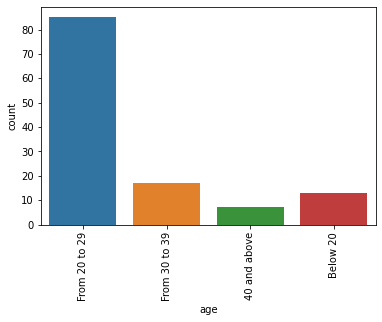

CountPlot for the column: status


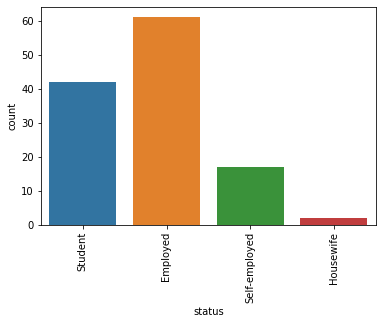

CountPlot for the column: income


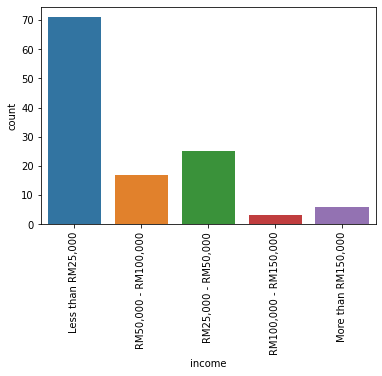

CountPlot for the column: visitNo


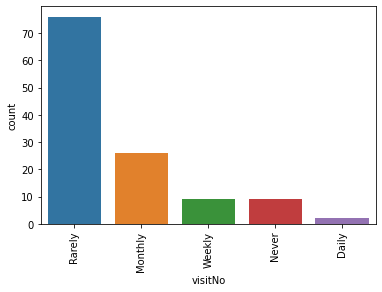

CountPlot for the column: visitType


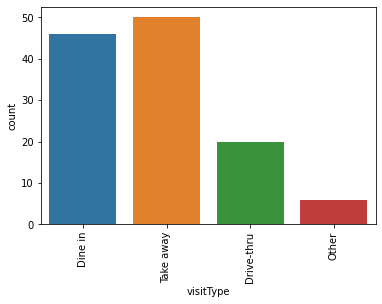

CountPlot for the column: timeSpend


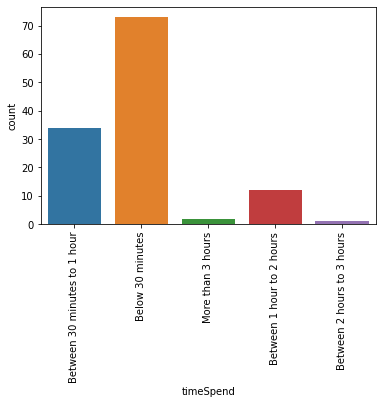

CountPlot for the column: distance


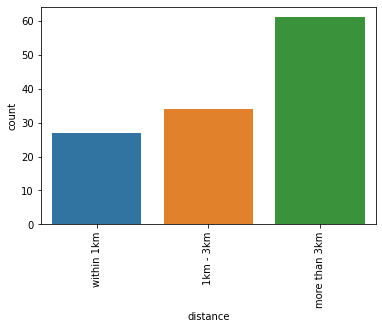

CountPlot for the column: membershipCard


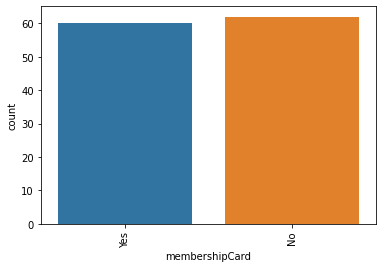

CountPlot for the column: frequent_purchase


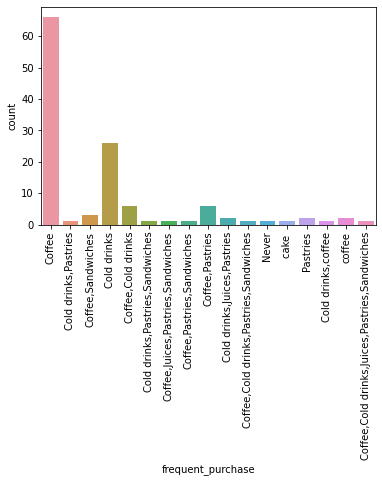

CountPlot for the column: spendPurchase


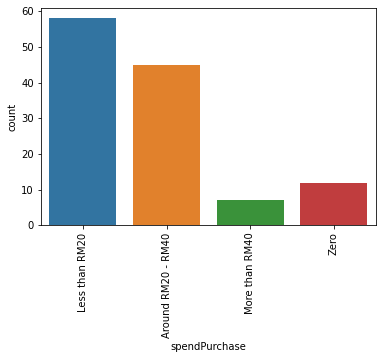

CountPlot for the column: promotionsMethod


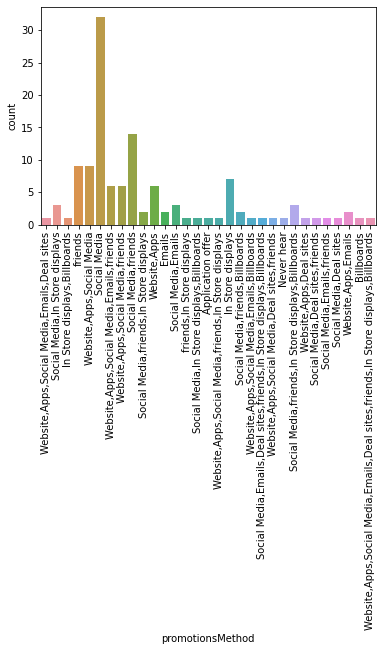

CountPlot for the column: loyalty


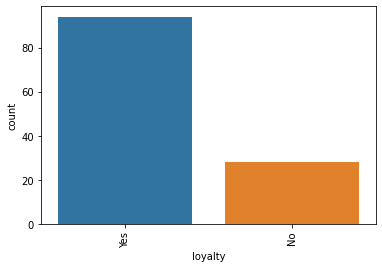

In [1040]:
for col in object_cols:
    print("CountPlot for the column: " + col)
    sns.countplot(data[col])
    plt.xticks(rotation=90)
    plt.show()

In [1041]:
data.dtypes

id                    int64
gender               object
age                  object
status               object
income               object
visitNo              object
visitType            object
timeSpend            object
distance             object
membershipCard       object
frequent_purchase    object
spendPurchase        object
productRate           int64
priceRate             int64
promotionsRate        int64
ambianceRate          int64
wifiRate              int64
serviceRate           int64
chooseRate            int64
promotionsMethod     object
loyalty              object
dtype: object

In [1042]:
int_cols= data.select_dtypes(include='int64').columns
int_cols

Index(['id', 'productRate', 'priceRate', 'promotionsRate', 'ambianceRate',
       'wifiRate', 'serviceRate', 'chooseRate'],
      dtype='object')

CountPlot for the column: productRate


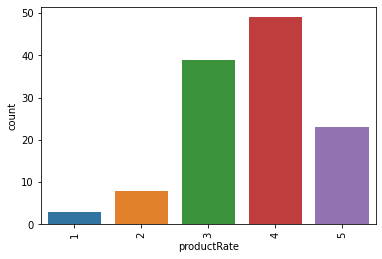

CountPlot for the column: priceRate


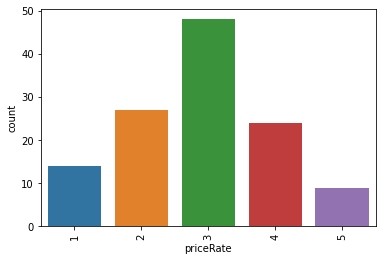

CountPlot for the column: promotionsRate


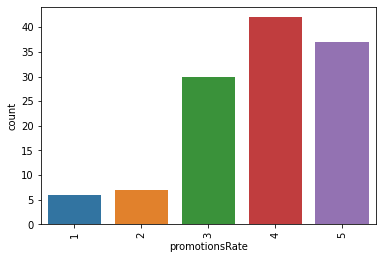

CountPlot for the column: ambianceRate


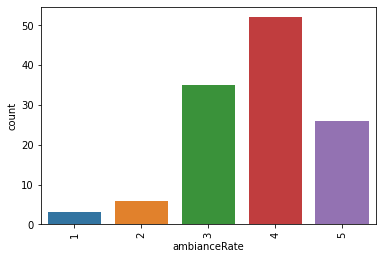

CountPlot for the column: wifiRate


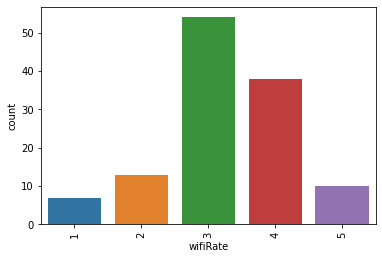

CountPlot for the column: serviceRate


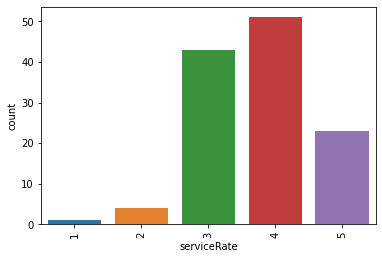

CountPlot for the column: chooseRate


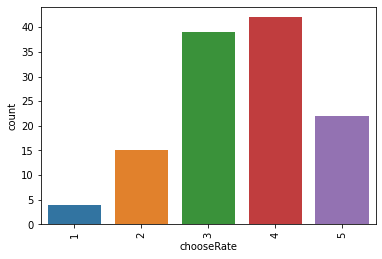

In [1043]:
for col in int_cols[1:]:
    print("CountPlot for the column: " + col)
    sns.countplot(data[col])
    plt.xticks(rotation=90)
    plt.show()

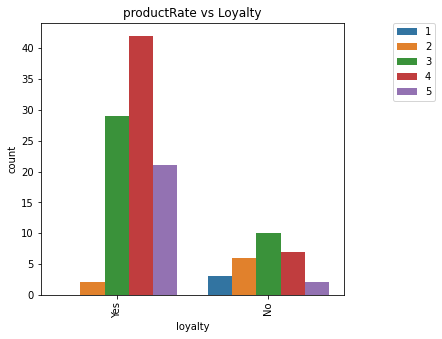

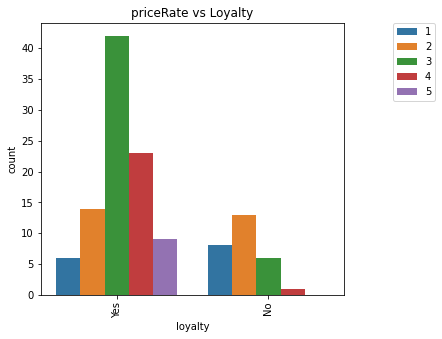

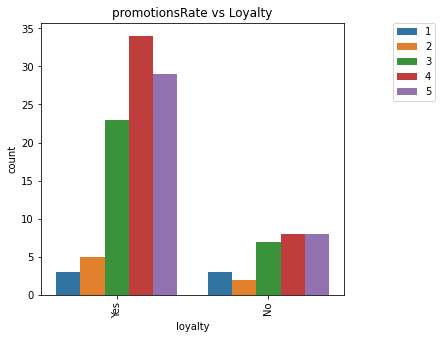

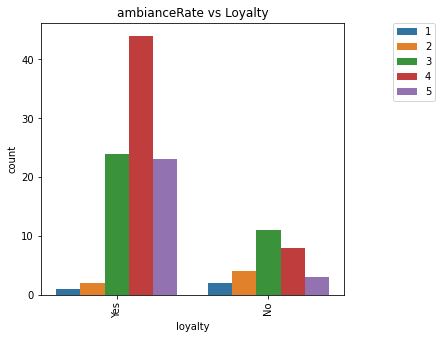

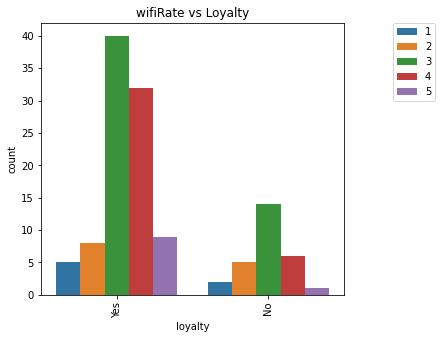

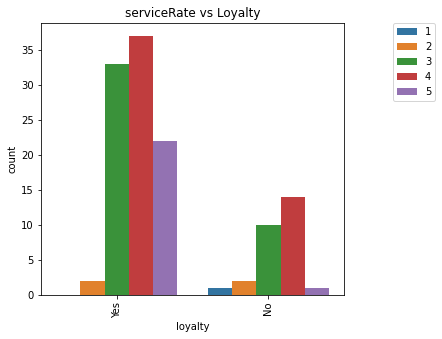

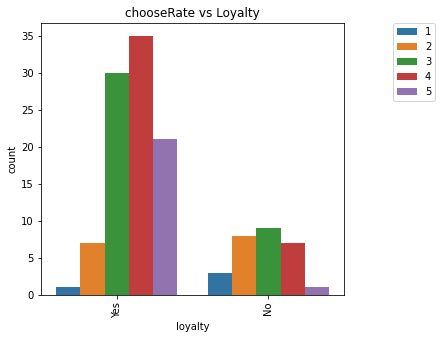

In [1044]:
#Bi-Variate Analysis for integer columns (only for loyalty)
for i in int_cols[1:]:
    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    sns.countplot(x=data['loyalty'], hue=data[i])
    plt.title(i+" vs Loyalty")
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
    plt.show()

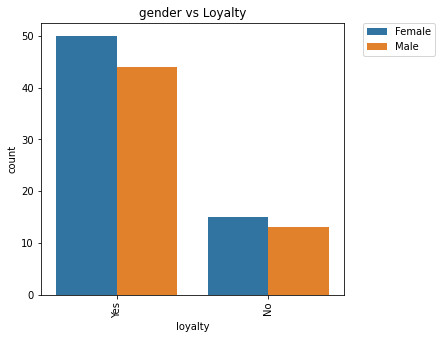

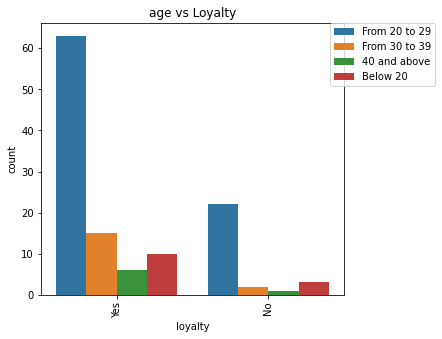

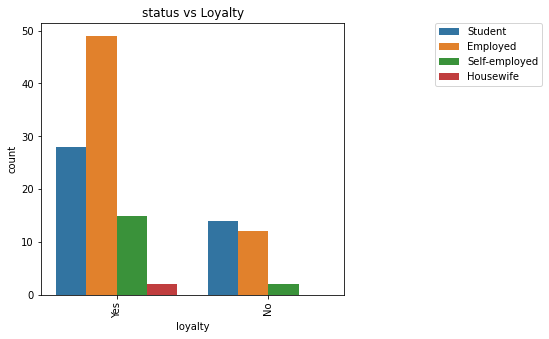

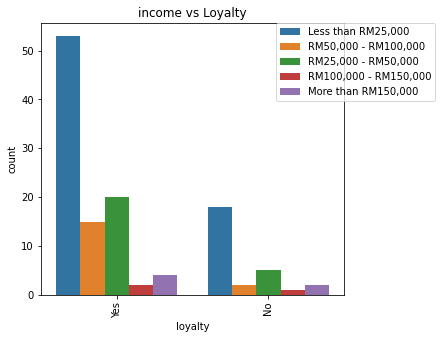

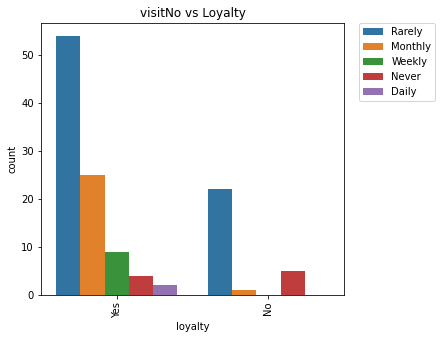

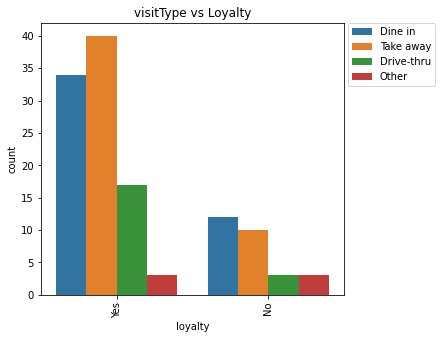

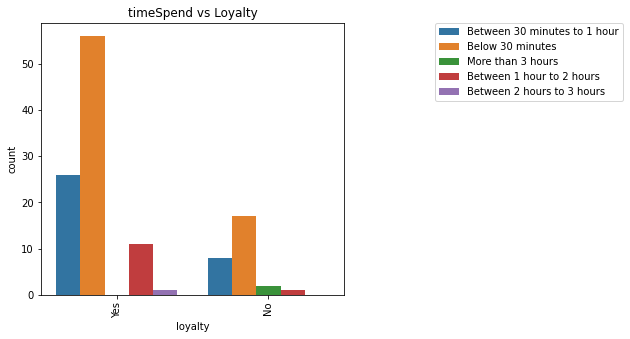

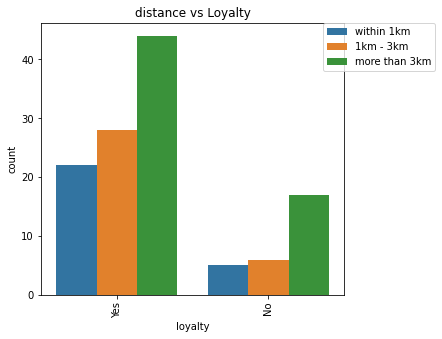

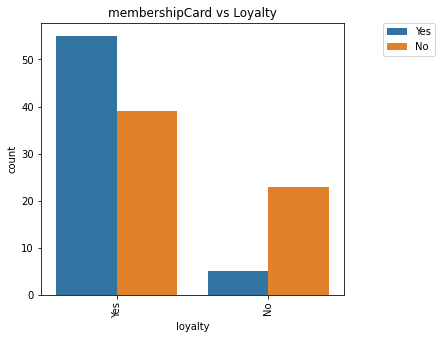

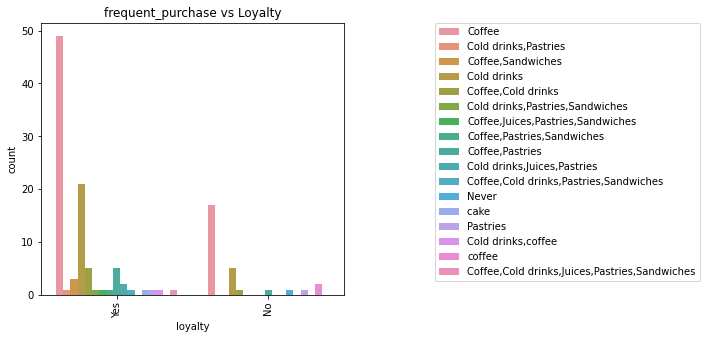

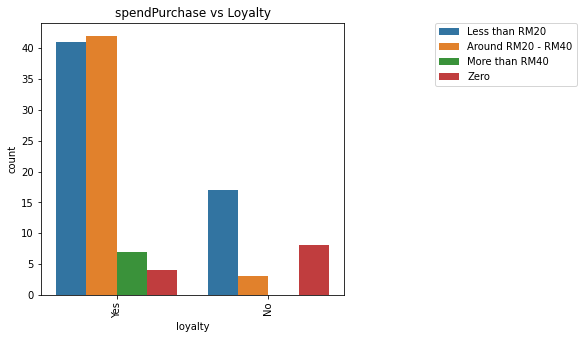

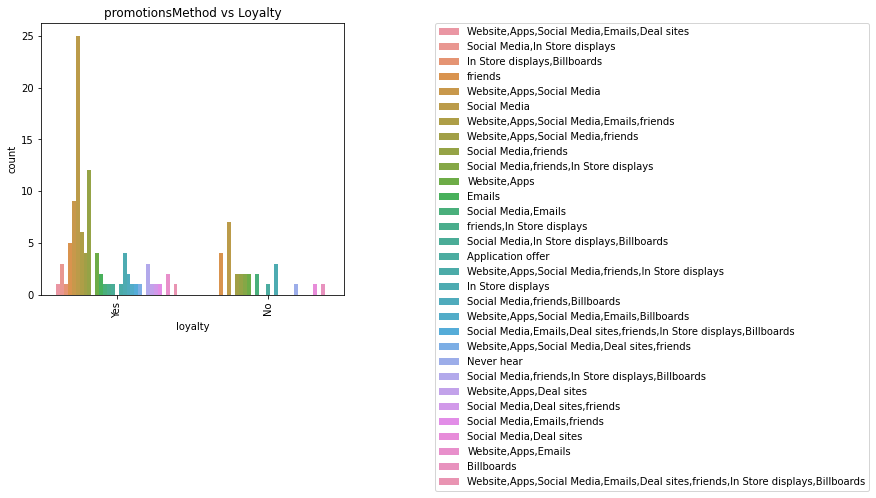

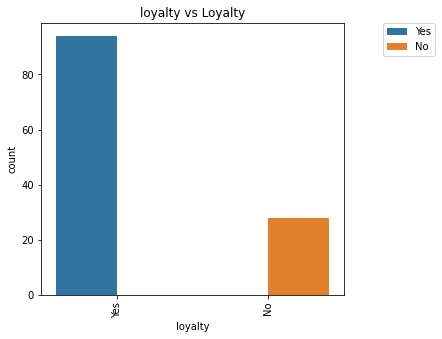

In [1045]:
#Bi-Variate Analysis for object columns (only for loyalty)
for i in object_cols:
    plt.figure(figsize=(25,5))
    plt.subplot(1,4,1)
    sns.countplot(x=data['loyalty'], hue=data[i])
    plt.title(i+" vs Loyalty")
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
    plt.show()

### For the question 10. What do you most frequently purchase at Starbucks?

We use the one-hot method to evaluate the most common items purchased by these customers at Starbucks. 

In [1046]:
Shorter_data1= data[['id','frequent_purchase']].copy(deep=True)
Shorter_data1['frequent_purchase'] = Shorter_data1.frequent_purchase.str.split(',')
Shorter_data1

,id,frequent_purchase
0,0,[Coffee]
1,1,"[Cold drinks, Pastries]"
2,2,[Coffee]
3,3,[Coffee]
4,4,"[Coffee, Sandwiches]"
...,...,...
117,117,[Coffee]
118,118,"[Coffee, Cold drinks, Juices, Pastries, Sandwi..."
119,119,"[Coffee, Cold drinks]"
120,120,[Coffee]


In [1047]:
# Let's iterate through data, then append the data items as columns of 1s or 0s.
# 1 if that column contains items at the present index and 0 if not.
Shorter_data = Shorter_data1
item_list = [] # store the purchased items

for index, row in Shorter_data.iterrows():
    for item in row['frequent_purchase']:
        Shorter_data.at[index, item] = 1
        if item not in item_list:
            item_list.append(item)
            

Shorter_data.head(3)

,id,frequent_purchase,Coffee,Cold drinks,Pastries,Sandwiches,Juices,Never,cake,coffee
0,0,[Coffee],1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"[Cold drinks, Pastries]",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2,[Coffee],1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1048]:
#Filling in the NaN values with 0 to show that a item doesn't have that column's genre
Shorter_data = Shorter_data.fillna(0)
Shorter_data.head(3)

,id,frequent_purchase,Coffee,Cold drinks,Pastries,Sandwiches,Juices,Never,cake,coffee
0,0,[Coffee],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"[Cold drinks, Pastries]",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,[Coffee],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1049]:
df=Shorter_data.sum(axis=0)
df=pd.DataFrame(df[2:])
df

,0
Coffee,85.0
Cold drinks,39.0
Pastries,16.0
Sandwiches,8.0
Juices,4.0
Never,1.0
cake,1.0
coffee,3.0


In [1050]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

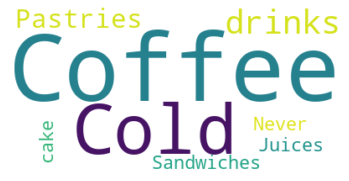

In [1051]:
text = str(df)
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### For the question 12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:

In [1052]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

dfP = data['productRate'].value_counts()
dfP = pd.DataFrame({'rating':dfP.index, 'Counts':dfP.values})

labels = dfP['rating']
values = dfP['Counts']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(margin = dict(t=4, l=0, r=0, b=0))
fig.show()

### For the question 13. How would you rate the price range at Starbucks?:

In [1053]:
np.mean(data["priceRate"])

2.8934426229508197

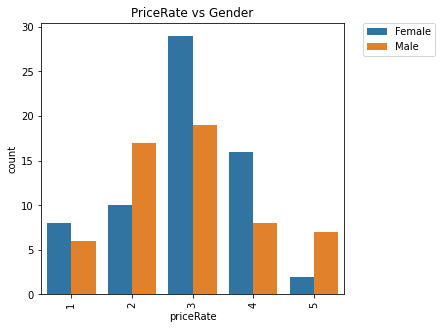

In [1054]:
#Evaluate relationship of pricerating and gender

plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(x=data["priceRate"], hue=data["gender"])
plt.title("PriceRate vs Gender")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.show()

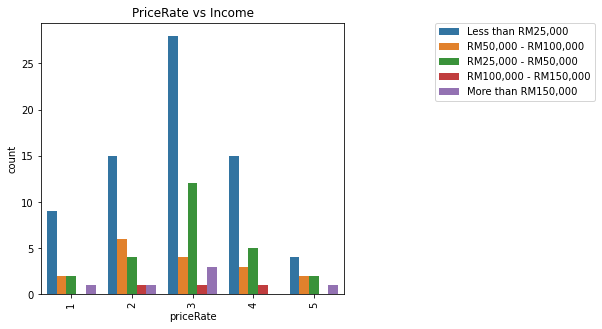

In [1055]:
#Evaluate relationship of pricerating and income

plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(x=data["priceRate"], hue=data["income"])
plt.title("PriceRate vs Income")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.show()

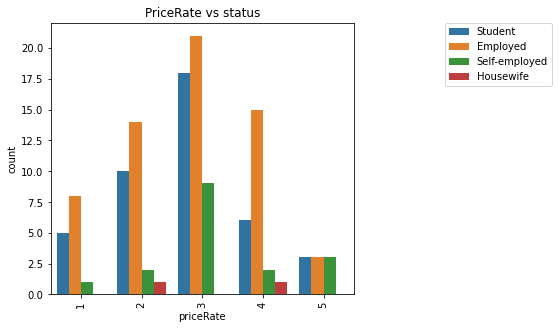

In [1056]:


plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(x=data["priceRate"], hue=data["status"])
plt.title("PriceRate vs status")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.show()

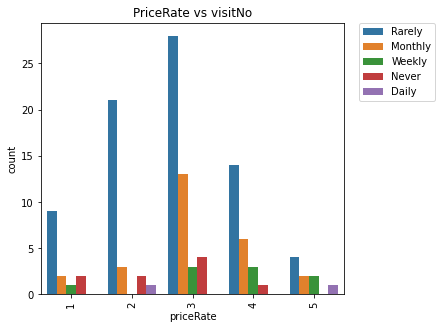

In [1057]:


plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(x=data["priceRate"], hue=data["visitNo"])
plt.title("PriceRate vs visitNo")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.show()

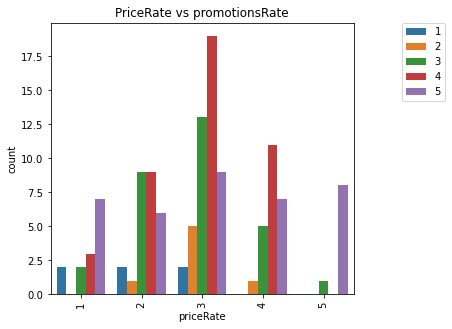

In [1058]:


plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(x=data["priceRate"], hue=data["promotionsRate"])
plt.title("PriceRate vs promotionsRate")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.show()

### Rated columns

We are trying to find some relationship between different columns which have rated by the costumers. 

In [1059]:
data.dtypes

id                    int64
gender               object
age                  object
status               object
income               object
visitNo              object
visitType            object
timeSpend            object
distance             object
membershipCard       object
frequent_purchase    object
spendPurchase        object
productRate           int64
priceRate             int64
promotionsRate        int64
ambianceRate          int64
wifiRate              int64
serviceRate           int64
chooseRate            int64
promotionsMethod     object
loyalty              object
dtype: object

In [1060]:
rated_data = data[['productRate','priceRate',
                   'promotionsRate','ambianceRate',
                   'wifiRate','serviceRate','chooseRate']].copy(deep=True)

In [1062]:
rated_data.describe()

,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## (2) Technical Advantages

In [1063]:
data.dtypes

id                    int64
gender               object
age                  object
status               object
income               object
visitNo              object
visitType            object
timeSpend            object
distance             object
membershipCard       object
frequent_purchase    object
spendPurchase        object
productRate           int64
priceRate             int64
promotionsRate        int64
ambianceRate          int64
wifiRate              int64
serviceRate           int64
chooseRate            int64
promotionsMethod     object
loyalty              object
dtype: object

In [1064]:
#In this dataset, many still use categorical variables.
#In order for machine learning to understand the data, these variables must be converted to numerical.
data["gender"].replace({"Female": 0, "Male": 1}, inplace=True)
data["age"].replace({"Below 20": 0, "From 20 to 29": 1, "From 30 to 39": 2, "40 and above": 3}, inplace=True)
data["status"].replace({"Student": 0, "Employed": 1, "Self-employed": 2, "Housewife": 3}, inplace=True)
data["income"].replace({"Less than RM25,000": 0, "RM25,000 - RM50,000": 1, "RM50,000 - RM100,000": 2, "RM100,000 - RM150,000": 3, "More than RM150,000": 4}, inplace=True)
data["visitNo"].replace({"Never": 0, "Rarely": 1, "Monthly": 2, "Weekly": 3, "Daily": 4}, inplace=True)
data["visitType"].replace({"Take away": 0, "Drive-thru": 2, "Dine in": 3, "Other":4}, inplace=True)
data["timeSpend"].replace({"Below 30 minutes": 0, "Between 30 minutes to 1 hour": 1, "Between 1 hour to 2 hours": 2, "Between 2 hours to 3 hours": 3, "More than 3 hours": 4}, inplace=True)
data["distance"].replace({"within 1km": 0, "1km - 3km": 1, "more than 3km": 2}, inplace=True)
data["membershipCard"].replace({"No": 0, "Yes": 1}, inplace=True)
data["spendPurchase"].replace({"Less than RM20": 0, "Around RM20 - RM40": 1, "More than RM40": 2}, inplace=True)
data["loyalty"].replace({"No": 0, "Yes": 1}, inplace=True)

In [1065]:
#Correlation:
data.corr()

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate,loyalty
id,1.000000,0.226486,0.027645,0.091220,0.002548,0.001037,0.126081,0.098048,0.194954,-0.203914,-0.212644,0.024087,-0.116056,-0.189255,-0.085234,-0.230512,-0.058405,-0.105715
gender,0.226486,1.000000,0.233924,0.064081,0.284979,0.205967,0.165993,0.272521,0.125217,0.064647,-0.014795,-0.014124,-0.125862,-0.123895,-0.077181,-0.129698,0.057085,0.003202
age,0.027645,0.233924,1.000000,0.457523,0.470974,0.200720,0.010063,0.173378,-0.030587,0.198335,0.026601,0.066848,0.030129,0.031885,-0.096577,0.111665,0.115096,0.090616
status,0.091220,0.064081,0.457523,1.000000,0.423593,0.203582,-0.088234,0.080554,-0.044614,0.234923,0.096345,0.103039,-0.045062,0.157625,-0.055572,0.229574,0.153419,0.194172
income,0.002548,0.284979,0.470974,0.423593,1.000000,0.191221,0.142959,0.206981,-0.043237,0.310393,-0.048507,0.005575,-0.138716,-0.099932,-0.253650,-0.050933,-0.003703,0.019821
visitNo,0.001037,0.205967,0.200720,0.203582,0.191221,1.000000,-0.150639,0.224106,-0.005546,0.351543,0.376125,0.245797,0.099985,0.260189,0.028241,0.182337,0.252565,0.332882
visitType,0.126081,0.165993,0.010063,-0.088234,0.142959,-0.150639,1.000000,0.332816,0.026154,-0.060543,-0.012776,0.107892,-0.097038,-0.154901,-0.197777,-0.231036,0.058992,-0.102888
timeSpend,0.098048,0.272521,0.173378,0.080554,0.206981,0.224106,0.332816,1.000000,0.034118,0.159392,0.160066,-0.024278,0.183220,0.074331,-0.140091,-0.017561,0.157596,-0.050840
distance,0.194954,0.125217,-0.030587,-0.044614,-0.043237,-0.005546,0.026154,0.034118,1.000000,-0.280415,-0.147930,-0.164785,-0.132022,-0.073250,-0.103191,-0.190128,-0.075244,-0.101963
membershipCard,-0.203914,0.064647,0.198335,0.234923,0.310393,0.351543,-0.060543,0.159392,-0.280415,1.000000,0.317671,0.158166,0.110139,0.261221,0.064493,0.282968,0.223949,0.341955


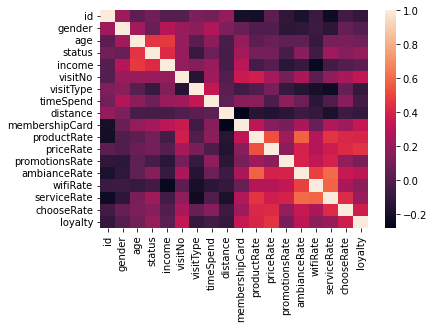

In [1066]:
#We present the correlation result in a heatmap in following. 
#According to the scale on the right side of the map, the brighter the colors, the stronger the correlation.
sns.heatmap(data.corr());

In [1067]:
# "No": 0, "Yes": 1
data['loyalty'].value_counts()

1    94
0    28
Name: loyalty, dtype: int64

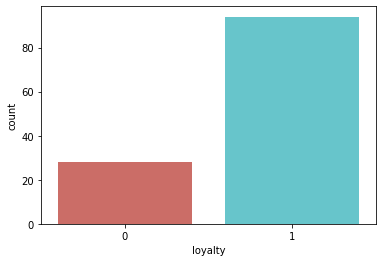

<Figure size 432x288 with 0 Axes>

In [1068]:
#the number of loyal costumers
sns.countplot(x='loyalty',data = data ,palette = 'hls')
plt.show()
plt.savefig('countplot')

In [1069]:
#the mean of dataset in relationship with loyalty(specially is useful for the rate columns)
data.groupby('loyalty').mean()

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate
loyalty,,,,,,,,,,,,,,,,,
0,67.321429,0.464286,1.035714,0.571429,0.714286,0.857143,1.928571,0.642857,1.428571,0.178571,2.964286,2.000000,3.571429,3.214286,2.964286,3.428571,2.821429
1,58.468085,0.468085,1.180851,0.904255,0.765957,1.478723,1.574468,0.542553,1.234043,0.585106,3.872340,3.159574,3.861702,3.914894,3.340426,3.840426,3.723404


## Classification

In [1070]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 122 non-null    int64 
 1   gender             122 non-null    int64 
 2   age                122 non-null    int64 
 3   status             122 non-null    int64 
 4   income             122 non-null    int64 
 5   visitNo            122 non-null    int64 
 6   visitType          122 non-null    int64 
 7   timeSpend          122 non-null    int64 
 8   distance           122 non-null    int64 
 9   membershipCard     122 non-null    int64 
 10  frequent_purchase  122 non-null    object
 11  spendPurchase      122 non-null    object
 12  productRate        122 non-null    int64 
 13  priceRate          122 non-null    int64 
 14  promotionsRate     122 non-null    int64 
 15  ambianceRate       122 non-null    int64 
 16  wifiRate           122 non-null    int64 
 1

In [1071]:
data_int =data.drop(['frequent_purchase', 'promotionsMethod','spendPurchase'], axis=1)
data_int.head(2)

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate,loyalty
0,0,0,1,0,0,1,3,1,0,1,4,3,5,5,4,4,3,1
1,1,0,1,0,0,1,0,0,1,1,4,3,4,4,4,5,2,1


In [1072]:
# Specify a list to store the result
result_list = []
def store_result(cur_result_list, i_method, i_RMSE):
    new_result={
        'method': i_method,
        'RMSE': i_RMSE
    }
    cur_result_list.append(new_result)
    
    return cur_result_list

In [1073]:
# LogisticRegression:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


In [1074]:
X = data_int.drop("loyalty", axis=1)
X = X.values
y = data_int["loyalty"]
y = y.values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=0)

In [1075]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [1076]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set:0.88


In [1077]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.90      0.95      0.92        19

    accuracy                           0.88        25
   macro avg       0.85      0.81      0.83        25
weighted avg       0.88      0.88      0.88        25



In [1078]:
confusion_matrix( y_test, y_pred)

array([[ 4,  2],
       [ 1, 18]], dtype=int64)

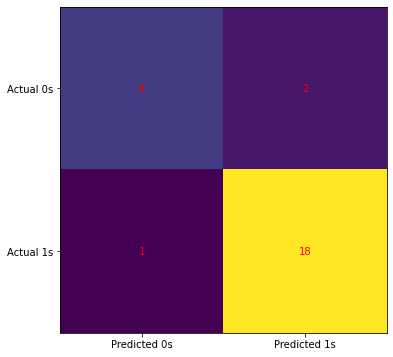

In [1079]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

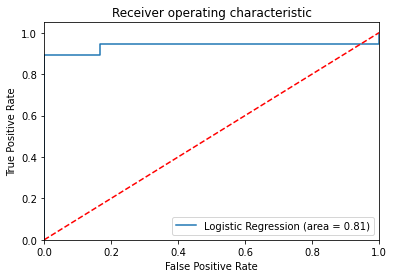

In [1080]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1081]:
#KNN algorithm:
X = data_int.drop("loyalty", axis=1)
X = X.values
y = data_int["loyalty"]
y = y.values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)


In [1082]:
#in here, we also tried to find the best value for the k (number of neighbors) and calculate the accuracy of the model
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print("k=",k,"train_accuracy=",train_accuracy[i],"test_accuracy=",test_accuracy[i])
 


k= 1 train_accuracy= 1.0 test_accuracy= 0.68
k= 2 train_accuracy= 0.9072164948453608 test_accuracy= 0.68
k= 3 train_accuracy= 0.865979381443299 test_accuracy= 0.8
k= 4 train_accuracy= 0.8556701030927835 test_accuracy= 0.8
k= 5 train_accuracy= 0.8350515463917526 test_accuracy= 0.8
k= 6 train_accuracy= 0.8350515463917526 test_accuracy= 0.8
k= 7 train_accuracy= 0.8556701030927835 test_accuracy= 0.84
k= 8 train_accuracy= 0.865979381443299 test_accuracy= 0.84


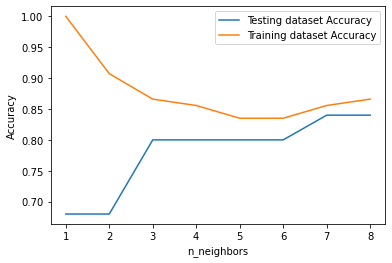

In [1083]:

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1084]:
#TFIDF and k mean


In [1085]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [1086]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [1087]:
train_set, test_set = train_test_split(data, test_size=.20)

In [1088]:
train_set['promotionsMethod'] = train_set.promotionsMethod.str.split('|')
train_set.head()

,id,gender,age,status,income,visitNo,visitType,timeSpend,distance,membershipCard,...,spendPurchase,productRate,priceRate,promotionsRate,ambianceRate,wifiRate,serviceRate,chooseRate,promotionsMethod,loyalty
22,22,1,1,1,1,1,3,4,0,0,...,0,5,2,5,5,2,4,3,[friends],0
31,31,0,1,1,2,3,2,0,0,1,...,1,4,3,3,3,2,3,4,[In Store displays],1
106,106,1,1,0,0,1,0,0,2,0,...,1,3,3,3,3,3,3,3,"[Website,Apps,Social Media]",1
6,6,0,1,0,0,1,3,0,0,1,...,1,5,5,5,5,3,5,5,"[Website,Apps,Social Media]",1
37,37,1,0,0,0,1,3,2,2,0,...,0,5,2,3,4,4,3,5,"[Website,Apps,Social Media]",1


In [1089]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

stopword = stopwords.words('english')

def get_wordnet_pos(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    
def preprocessing(text):
    
    
    # remove punctuation
    text_rp = "".join([char for char in text if char not in string.punctuation])
    
    # word tokenization 
    tokens = word_tokenize(text_rp)
    
    # remove stopwords  
    
    tokens_without_stopwords = [word for word in tokens if word not in stopword]

    # lemm
    tagged_tokens = nltk.pos_tag(tokens_without_stopwords)
    #print(tagged_tokens)
    tokens_processed = []
    
    lemmatizer = WordNetLemmatizer()
    for word, tag in tagged_tokens:
        word_net_tag = get_wordnet_pos(tag)
        if word_net_tag != '':
            tokens_processed.append(lemmatizer.lemmatize(word, word_net_tag))
        else:
            tokens_processed.append(word)
    text_processed = ' '.join(tokens_processed)
    
    return text_processed

In [1090]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.cluster import KMeans

#Define a TF-IDF Vectorizer Object. 
tfidf = TfidfVectorizer(
    preprocessor=preprocessing, 
    ngram_range=(1,1),
    max_features=100)

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(train_set['promotionsMethod'] )

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(97, 17)

In [1091]:
tfidf.get_feature_names()[0:20]

['Application',
 'Apps',
 'Billboards',
 'Deal',
 'Emails',
 'In',
 'Media',
 'Never',
 'Social',
 'Store',
 'Website',
 'display',
 'friend',
 'friends',
 'hear',
 'offer',
 'sit']

In [1092]:
X = tfidf.fit_transform(train_set['promotionsMethod'])
feature_name = tfidf.get_feature_names()
print(feature_name)

['Application', 'Apps', 'Billboards', 'Deal', 'Emails', 'In', 'Media', 'Never', 'Social', 'Store', 'Website', 'display', 'friend', 'friends', 'hear', 'offer', 'sit']


In [1093]:
review_vector = pd.DataFrame(X.toarray(),columns=feature_name)
print(review_vector)

    Application      Apps  Billboards  Deal    Emails       In     Media  \
0           0.0  0.000000         0.0   0.0  0.000000  0.00000  0.000000   
1           0.0  0.000000         0.0   0.0  0.000000  0.57735  0.000000   
2           0.0  0.601686         0.0   0.0  0.000000  0.00000  0.371449   
3           0.0  0.601686         0.0   0.0  0.000000  0.00000  0.371449   
4           0.0  0.601686         0.0   0.0  0.000000  0.00000  0.371449   
..          ...       ...         ...   ...       ...      ...       ...   
92          0.0  0.601686         0.0   0.0  0.000000  0.00000  0.371449   
93          0.0  0.000000         0.0   0.0  0.000000  0.00000  0.000000   
94          0.0  0.000000         0.0   0.0  0.835421  0.00000  0.388633   
95          0.0  0.000000         0.0   0.0  0.000000  0.00000  0.497147   
96          0.0  0.000000         0.0   0.0  0.000000  0.00000  0.707107   

       Never    Social    Store   Website  display    friend  friends  \
0   0.000000  

In [1094]:
import statsmodels.api as sm

In [1095]:
kmeans = KMeans(3)
kmeans.fit(tfidf_matrix )

KMeans(n_clusters=3)

In [1096]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.cluster import KMeans

#Define a TF-IDF Vectorizer Object. 
tfidf_test = TfidfVectorizer(
    preprocessor=preprocessing, 
    ngram_range=(1,1),
    max_features=100)

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_test = tfidf_test.fit_transform(test_set['promotionsMethod'] )

#Output the shape of tfidf_matrix
tfidf_matrix_test.shape

(25, 15)

In [1097]:
X_test = tfidf_test.fit_transform(test_set['promotionsMethod'])
feature_name_test = tfidf_test.get_feature_names()
print(feature_name_test)

['In', 'Media', 'MediaDeal', 'MediaEmails', 'MediaIn', 'Mediafriends', 'MediafriendsBillboards', 'MediafriendsIn', 'Social', 'Store', 'WebsiteAppsEmails', 'WebsiteAppsSocial', 'display', 'friend', 'sitesfriends']


In [1098]:
identified_clusters = kmeans.fit_predict(tfidf_matrix_test)
identified_clusters

array([1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0,
       1, 1, 2])

Text(0, 0.5, 'WCSS')

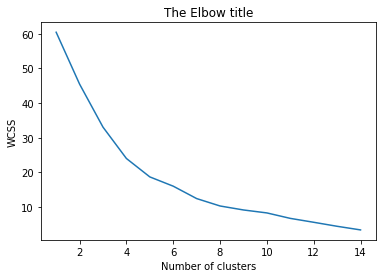

In [1099]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(tfidf_matrix)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'SSE')

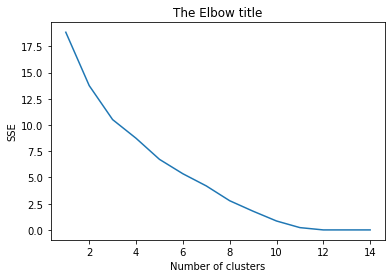

In [1100]:
sse=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit_predict(tfidf_matrix_test)
    sse_iter = kmeans.inertia_
    sse.append(sse_iter)

number_clusters = range(1,15)
plt.plot(number_clusters,sse)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [1102]:
Shorter_data1= data[['id','promotionsMethod']].copy(deep=True)
Shorter_data1['promotionsMethod'] = Shorter_data1.promotionsMethod.str.split(',')
Shorter_data1

,id,promotionsMethod
0,0,"[Website, Apps, Social Media, Emails, Deal sites]"
1,1,"[Social Media, In Store displays]"
2,2,"[In Store displays, Billboards]"
3,3,[friends]
4,4,"[Website, Apps, Social Media]"
...,...,...
117,117,"[Website, Apps, Social Media]"
118,118,"[Website, Apps, Social Media, Emails, Deal sit..."
119,119,"[Social Media, friends, In Store displays]"
120,120,"[Social Media, friends, Billboards]"


In [1103]:
Shorter_data = Shorter_data1
item_list = [] # store the purchased items

for index, row in Shorter_data.iterrows():
    for item in row['promotionsMethod']:
        Shorter_data.at[index, item] = 1
        if item not in item_list:
            item_list.append(item)
            

Shorter_data.head(3)

,id,promotionsMethod,Website,Apps,Social Media,Emails,Deal sites,In Store displays,Billboards,friends,Application offer,Never hear
0,0,"[Website, Apps, Social Media, Emails, Deal sites]",1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1,"[Social Media, In Store displays]",NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,2,"[In Store displays, Billboards]",NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [1104]:
Shorter_data = Shorter_data.fillna(0)
Shorter_data.head(3)

,id,promotionsMethod,Website,Apps,Social Media,Emails,Deal sites,In Store displays,Billboards,friends,Application offer,Never hear
0,0,"[Website, Apps, Social Media, Emails, Deal sites]",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,"[Social Media, In Store displays]",0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,"[In Store displays, Billboards]",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [1107]:
df=Shorter_data.sum(axis=0)
df=pd.DataFrame(df[2:])
df

,0
Website,35.0
Apps,35.0
Social Media,90.0
Emails,18.0
Deal sites,7.0
In Store displays,21.0
Billboards,11.0
friends,49.0
Application offer,1.0
Never hear,1.0


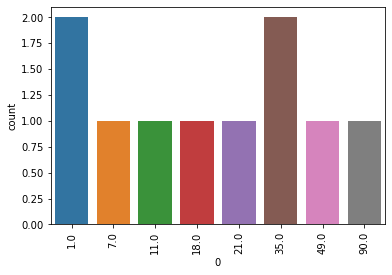

In [1110]:
sns.countplot(df[0])
plt.xticks(rotation=90)
plt.show()